In [15]:
#import plaidml.keras
#plaidml.keras.install_backend()

In [2]:
import keras 
import datetime 
from keras import optimizers
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D,MaxPooling2D, Flatten, BatchNormalization
from keras.optimizers import SGD
from sklearn.preprocessing import OneHotEncoder

from keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

%config IPCompleter.greedy=True

Using TensorFlow backend.


# Pre-processing

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
# number of classes in the dataset
num_classes= 10

#class_names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print(x_train.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 1)


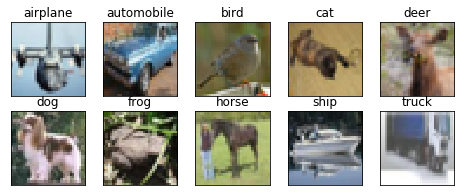

In [5]:
# print figure with 10 random images from each class
fig= plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax=fig.add_subplot(2,5,1+i,xticks=[],yticks=[])
    idx=np.where(y_train[:]==i)[0]
    features_idx=x_train[idx,::]
    img_num=np.random.randint(features_idx.shape[0])
    im=features_idx[img_num,::]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [6]:
datagen = ImageDataGenerator (rotation_range=90,
                              featurewise_center=True,
                              featurewise_std_normalization=True,
                              width_shift_range=0.2, 
                              height_shift_range=0.2,
                              channel_shift_range=0.3,
                              brightness_range=(0.3,0.3),
                              horizontal_flip=True)

datagen.fit(x_train)

# Data Augmentation

In [7]:
augmented_x=[]
augmented_y=[]
num_augmented=0

for x_batch, y_batch in datagen.flow(x_train,y_train,batch_size=10,shuffle=True):
    augmented_x.append(x_batch)
    augmented_y.append(y_batch)
    num_augmented+=10
    if num_augmented==x_train.shape[0]:
        break
        
augmented_x=np.concatenate(augmented_x)
augmented_y=np.concatenate(augmented_y)

In [8]:
augmented_x.shape[1]

32

In [9]:
new_x_train=np.concatenate((x_train,augmented_x), axis=0)
new_y_train=np.concatenate((y_train, augmented_y), axis=0)

norm_x_train= new_x_train/255
norm_x_test= x_test/255

x_trainvec= np.reshape(norm_x_train,(norm_x_train.shape[0],norm_x_train.shape[1]*norm_x_train.shape[2]*norm_x_train.shape[3]))
x_testvec= np.reshape(norm_x_test,(norm_x_test.shape[0],norm_x_test.shape[1]*norm_x_test.shape[2]*norm_x_test.shape[3]))

In [10]:
x_trainvec.shape

(100000, 3072)

In [11]:

y_train_ohe=np.eye(num_classes)[new_y_train]
y_test_ohe=np.eye(num_classes)[y_test]

new_y_train_ohe = np.squeeze(y_train_ohe, axis=1)
new_y_test_ohe = np.squeeze(y_test_ohe, axis=1)



In [12]:
new_y_train_ohe.shape

(100000, 10)

# Feed-forward Neural Networks (FFNNs)

In [13]:
def plot_model_metrics(model_history):
    #plot loss
    fig1= plt.figure(1)
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('categorical cross-entropy loss')
    plt.xlabel('epoch')
    plt.legend(['train','validation'],loc='upper right')
    
    #plot accuracy
    fig2= plt.figure(2)
    plt.plot(model_history.history['acc'])
    plt.plot(model_history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train','validation'],loc='upper right')
    
    plt.show()

In [22]:
sgd2=optimizers.SGD(lr=0.1,decay=1e-6, momentum=0.9, nesterov=True) 

BEST FFNN!

In [24]:
model14= Sequential()

model14= Sequential()
model14.add(Dense(3072, activation='relu',input_dim=3072,kernel_initializer='he_normal'))
model14.add(Dropout(0.3))
model14.add(Dense(1024, activation='relu',kernel_initializer='he_normal'))
model14.add(Dropout(0.3))
model14.add(Dense(256, activation='relu',kernel_initializer='he_normal'))
model14.add(Dropout(0.3))
model14.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model14.add(Dropout(0.3))
model14.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model14.add(Dense(10,activation='softmax',kernel_initializer='he_normal'))

initial_time14= datetime.datetime.now()

model14.compile(loss='categorical_crossentropy',optimizer=sgd2,metrics=['accuracy'])

history14=model14.fit(x_trainvec,new_y_train_ohe, epochs=500,batch_size=64, validation_data=(x_testvec,new_y_test_ohe))

score14=model14.evaluate(x_testvec,new_y_test_ohe,batch_size=64)

finishing_time14= datetime.datetime.now()

training_time14= finishing_time14-initial_time14

print('Training:',training_time14)
print('Score:', score14)

plot_model_metrics(history14)

Train on 100000 samples, validate on 10000 samples
Epoch 1/200
100000/100000 [==============================] - 17s 169us/step - loss: 2.1859 - acc: 0.1626 - val_loss: 1.9218 - val_acc: 0.2861
Epoch 2/200
100000/100000 [==============================] - 16s 162us/step - loss: 2.0618 - acc: 0.2213 - val_loss: 1.8112 - val_acc: 0.3343
Epoch 3/200
  6848/100000 [=>............................] - ETA: 14s - loss: 2.0356 - acc: 0.2404

KeyboardInterrupt: 

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 41s 811us/step - loss: 2.1220 - acc: 0.2418 - val_loss: 1.8189 - val_acc: 0.3420
Epoch 2/500
50000/50000 [==============================] - 38s 766us/step - loss: 1.8523 - acc: 0.3299 - val_loss: 1.9355 - val_acc: 0.3053
Epoch 3/500
50000/50000 [==============================] - 38s 764us/step - loss: 1.7865 - acc: 0.3595 - val_loss: 1.7903 - val_acc: 0.3455
Epoch 4/500
50000/50000 [==============================] - 38s 766us/step - loss: 1.7479 - acc: 0.3722 - val_loss: 1.7376 - val_acc: 0.3835
Epoch 5/500
50000/50000 [==============================] - 38s 762us/step - loss: 1.7211 - acc: 0.3866 - val_loss: 1.5963 - val_acc: 0.4405
Epoch 6/500
50000/50000 [==============================] - 38s 765us/step - loss: 1.7005 - acc: 0.3932 - val_loss: 1.5835 - val_acc: 0.4368
Epoch 7/500
50000/50000 [==============================] - 38s 764us/step - loss: 1.6862 - acc: 0.4010 - val_l

50000/50000 [==============================] - 38s 761us/step - loss: 1.4167 - acc: 0.5016 - val_loss: 1.3632 - val_acc: 0.5158
Epoch 117/500
50000/50000 [==============================] - 38s 763us/step - loss: 1.4211 - acc: 0.4985 - val_loss: 1.3796 - val_acc: 0.5112
Epoch 118/500
50000/50000 [==============================] - 38s 763us/step - loss: 1.4221 - acc: 0.4981 - val_loss: 1.3342 - val_acc: 0.5219
Epoch 119/500
50000/50000 [==============================] - 38s 764us/step - loss: 1.4205 - acc: 0.4986 - val_loss: 1.3499 - val_acc: 0.5239
Epoch 120/500
50000/50000 [==============================] - 38s 764us/step - loss: 1.4159 - acc: 0.5001 - val_loss: 1.3451 - val_acc: 0.5266
Epoch 121/500
50000/50000 [==============================] - 38s 762us/step - loss: 1.4165 - acc: 0.4993 - val_loss: 1.3432 - val_acc: 0.5229
Epoch 122/500
50000/50000 [==============================] - 38s 763us/step - loss: 1.4112 - acc: 0.5007 - val_loss: 1.3729 - val_acc: 0.5123
Epoch 123/500
50000/

Epoch 231/500
50000/50000 [==============================] - 38s 764us/step - loss: 1.3280 - acc: 0.5310 - val_loss: 1.3241 - val_acc: 0.5275
Epoch 232/500
50000/50000 [==============================] - 38s 761us/step - loss: 1.3259 - acc: 0.5307 - val_loss: 1.3330 - val_acc: 0.5241
Epoch 233/500
50000/50000 [==============================] - 38s 767us/step - loss: 1.3269 - acc: 0.5336 - val_loss: 1.3435 - val_acc: 0.5246
Epoch 234/500
50000/50000 [==============================] - 38s 765us/step - loss: 1.3282 - acc: 0.5315 - val_loss: 1.3705 - val_acc: 0.5122
Epoch 235/500
50000/50000 [==============================] - 38s 765us/step - loss: 1.3271 - acc: 0.5330 - val_loss: 1.3139 - val_acc: 0.5327
Epoch 236/500
50000/50000 [==============================] - 38s 764us/step - loss: 1.3322 - acc: 0.5289 - val_loss: 1.3410 - val_acc: 0.5232
Epoch 237/500
50000/50000 [==============================] - 38s 761us/step - loss: 1.3222 - acc: 0.5338 - val_loss: 1.3646 - val_acc: 0.5225
Epoch 

Epoch 289/500
50000/50000 [==============================] - 38s 764us/step - loss: 1.2954 - acc: 0.5404 - val_loss: 1.3370 - val_acc: 0.5275
Epoch 290/500
50000/50000 [==============================] - 38s 763us/step - loss: 1.2978 - acc: 0.5406 - val_loss: 1.3288 - val_acc: 0.5290
Epoch 291/500
50000/50000 [==============================] - 38s 762us/step - loss: 1.2931 - acc: 0.5427 - val_loss: 1.3524 - val_acc: 0.5191
Epoch 292/500
50000/50000 [==============================] - 38s 763us/step - loss: 1.2999 - acc: 0.5393 - val_loss: 1.3542 - val_acc: 0.5221
Epoch 293/500
50000/50000 [==============================] - 38s 762us/step - loss: 1.2881 - acc: 0.5444 - val_loss: 1.3441 - val_acc: 0.5265
Epoch 294/500
50000/50000 [==============================] - 38s 764us/step - loss: 1.2919 - acc: 0.5438 - val_loss: 1.3763 - val_acc: 0.5074
Epoch 295/500
50000/50000 [==============================] - 38s 765us/step - loss: 1.2929 - acc: 0.5447 - val_loss: 1.3399 - val_acc: 0.5314
Epoch 

Epoch 404/500
50000/50000 [==============================] - 38s 765us/step - loss: 1.2399 - acc: 0.5615 - val_loss: 1.3830 - val_acc: 0.5157
Epoch 405/500
50000/50000 [==============================] - 38s 769us/step - loss: 1.2362 - acc: 0.5646 - val_loss: 1.3373 - val_acc: 0.5354
Epoch 406/500
50000/50000 [==============================] - 38s 763us/step - loss: 1.2368 - acc: 0.5631 - val_loss: 1.3384 - val_acc: 0.5278
Epoch 407/500
50000/50000 [==============================] - 38s 763us/step - loss: 1.2355 - acc: 0.5609 - val_loss: 1.3823 - val_acc: 0.5087
Epoch 408/500
50000/50000 [==============================] - 38s 764us/step - loss: 1.2408 - acc: 0.5622 - val_loss: 1.3240 - val_acc: 0.5341
Epoch 409/500
50000/50000 [==============================] - 38s 764us/step - loss: 1.2333 - acc: 0.5638 - val_loss: 1.3478 - val_acc: 0.5244
Epoch 410/500
50000/50000 [==============================] - 38s 764us/step - loss: 1.2312 - acc: 0.5655 - val_loss: 1.3567 - val_acc: 0.5282
Epoch 

Epoch 462/500
50000/50000 [==============================] - 38s 762us/step - loss: 1.2348 - acc: 0.5651 - val_loss: 1.3693 - val_acc: 0.5177
Epoch 463/500
50000/50000 [==============================] - 38s 759us/step - loss: 1.2403 - acc: 0.5637 - val_loss: 1.3749 - val_acc: 0.5194
Epoch 464/500
50000/50000 [==============================] - 38s 764us/step - loss: 1.2449 - acc: 0.5615 - val_loss: 1.3662 - val_acc: 0.5161
Epoch 465/500
50000/50000 [==============================] - 38s 761us/step - loss: 1.2404 - acc: 0.5629 - val_loss: 1.3704 - val_acc: 0.5158
Epoch 466/500
50000/50000 [==============================] - 38s 764us/step - loss: 1.2303 - acc: 0.5626 - val_loss: 1.3653 - val_acc: 0.5307
Epoch 467/500
50000/50000 [==============================] - 38s 762us/step - loss: 1.2350 - acc: 0.5636 - val_loss: 1.3399 - val_acc: 0.5275
Epoch 468/500
50000/50000 [==============================] - 38s 759us/step - loss: 1.2366 - acc: 0.5632 - val_loss: 1.3498 - val_acc: 0.5288
Epoch 

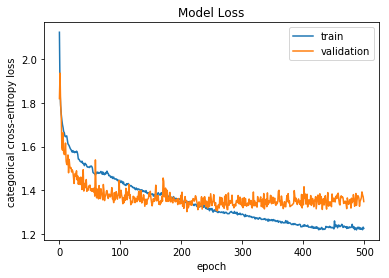

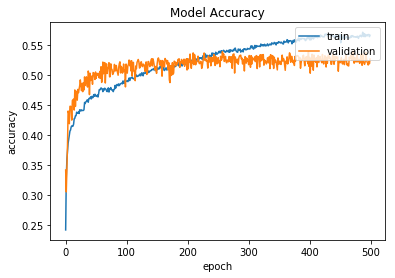

In [12]:
model18= Sequential()

model18= Sequential()
model18.add(Dense(3072, activation='relu',input_dim=3072,kernel_initializer='he_normal'))
model18.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
)
model18.add(Dropout(0.4))
model18.add(Dense(1024, activation='relu',kernel_initializer='he_normal'))
model18.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
)
model18.add(Dropout(0.3))
model18.add(Dense(1024, activation='relu',kernel_initializer='he_normal'))
model18.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
)
model18.add(Dropout(0.3))
model18.add(Dense(1024, activation='relu',kernel_initializer='he_normal'))
model17.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
)
model18.add(Dropout(0.3))
model18.add(Dense(256, activation='relu',kernel_initializer='he_normal'))
model18.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
)
model18.add(Dropout(0.3))
model18.add(Dense(256, activation='relu',kernel_initializer='he_normal'))
model18.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
)
model18.add(Dropout(0.3))
model18.add(Dense(256, activation='relu',kernel_initializer='he_normal'))
model18.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
)
model18.add(Dropout(0.3))
model18.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model18.add(Dense(10,activation='softmax',kernel_initializer='he_normal'))

initial_time18= datetime.datetime.now()

model18.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

history18=model18.fit(x_trainvec,new_y_train_ohe, epochs=500,batch_size=32, validation_data=(x_testvec,new_y_test_ohe))

score18=model18.evaluate(x_testvec,new_y_test_ohe,batch_size=32)

finishing_time18= datetime.datetime.now()

training_time18= finishing_time18-initial_time18

print('Training:',training_time18)
print('Score:', score18)

plot_model_metrics(history18)

## Convolutional Neural Networks

In [ ]:
batch_size=32
epochs=200
data augmentation 

In [15]:
model17= Sequential()

model17= Sequential()
model17.add(Dense(3072, activation='relu',input_dim=3072,kernel_initializer='he_normal'))
model17.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
)
model17.add(Dropout(0.4))
model17.add(Dense(1024, activation='relu',kernel_initializer='he_normal'))
model17.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
)
model17.add(Dropout(0.3))
model17.add(Dense(1024, activation='relu',kernel_initializer='he_normal'))
model17.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
)
model17.add(Dropout(0.3))
model17.add(Dense(1024, activation='relu',kernel_initializer='he_normal'))
model17.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
)
model17.add(Dropout(0.3))
model17.add(Dense(256, activation='relu',kernel_initializer='he_normal'))
model17.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
)
model17.add(Dropout(0.3))
model17.add(Dense(256, activation='relu',kernel_initializer='he_normal'))
model17.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
)
model17.add(Dropout(0.3))
model17.add(Dense(256, activation='relu',kernel_initializer='he_normal'))
model17.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
)
model17.add(Dropout(0.3))
model17.add(Dense(64,activation='relu',kernel_initializer='he_normal'))
model17.add(Dense(10,activation='softmax',kernel_initializer='he_normal'))

initial_time17= datetime.datetime.now()

model17.compile(loss='categorical_crossentropy',optimizer=sgd2,metrics=['accuracy'])

history17=model17.fit(x_trainvec,new_y_train_ohe, epochs=500,batch_size=64, validation_data=(x_testvec,new_y_test_ohe))

score17=model17.evaluate(x_testvec,new_y_test_ohe,batch_size=64)

finishing_time17= datetime.datetime.now()

training_time17= finishing_time17-initial_time17

print('Training:',training_time17)
print('Score:', score17)

plot_model_metrics(history17)

Train on 100000 samples, validate on 10000 samples
Epoch 1/500
100000/100000 [==============================] - 33s 335us/step - loss: 2.2265 - acc: 0.1619 - val_loss: 1.9357 - val_acc: 0.2720
Epoch 2/500
100000/100000 [==============================] - 31s 311us/step - loss: 2.1064 - acc: 0.2097 - val_loss: 1.8271 - val_acc: 0.3296
Epoch 3/500
100000/100000 [==============================] - 31s 310us/step - loss: 2.0443 - acc: 0.2375 - val_loss: 1.8061 - val_acc: 0.3374
Epoch 4/500
100000/100000 [==============================] - 31s 311us/step - loss: 2.0252 - acc: 0.2478 - val_loss: 1.7666 - val_acc: 0.3633
Epoch 5/500
100000/100000 [==============================] - 31s 311us/step - loss: 2.0094 - acc: 0.2532 - val_loss: 1.7614 - val_acc: 0.3674
Epoch 6/500
100000/100000 [==============================] - 31s 310us/step - loss: 2.0022 - acc: 0.2587 - val_loss: 1.7941 - val_acc: 0.3667
Epoch 7/500
100000/100000 [==============================] - 31s 311us/step - loss: 2.0021 - acc:

Epoch 58/500
100000/100000 [==============================] - 31s 310us/step - loss: 1.9291 - acc: 0.2803 - val_loss: 1.5352 - val_acc: 0.4488
Epoch 59/500
100000/100000 [==============================] - 31s 309us/step - loss: 1.9263 - acc: 0.2804 - val_loss: 1.5291 - val_acc: 0.4601
Epoch 60/500
100000/100000 [==============================] - 31s 307us/step - loss: 1.9259 - acc: 0.2817 - val_loss: 1.5401 - val_acc: 0.4565
Epoch 61/500
100000/100000 [==============================] - 31s 312us/step - loss: 1.9229 - acc: 0.2834 - val_loss: 1.5143 - val_acc: 0.4613
Epoch 62/500
100000/100000 [==============================] - 31s 312us/step - loss: 1.9204 - acc: 0.2845 - val_loss: 1.5160 - val_acc: 0.4554
Epoch 63/500
100000/100000 [==============================] - 31s 313us/step - loss: 1.9156 - acc: 0.2871 - val_loss: 1.5178 - val_acc: 0.4573
Epoch 64/500
100000/100000 [==============================] - 31s 313us/step - loss: 1.9161 - acc: 0.2872 - val_loss: 1.5043 - val_acc: 0.4624

Epoch 172/500
100000/100000 [==============================] - 31s 308us/step - loss: 1.7620 - acc: 0.3491 - val_loss: 1.3609 - val_acc: 0.5194
Epoch 173/500
100000/100000 [==============================] - 31s 309us/step - loss: 1.7620 - acc: 0.3484 - val_loss: 1.3473 - val_acc: 0.5225
Epoch 174/500
 94784/100000 [===========================>..] - ETA: 1s - loss: 1.7619 - acc: 0.3482

KeyboardInterrupt: 

In [13]:
batch_size = 64

weight_decay = 1e-4
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
 
model.summary()

opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
history=model.fit_generator(datagen.flow(new_x_train, new_y_train_ohe, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=128,\
                    verbose=1,validation_data=(x_test,new_y_test_ohe))




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
__________

781/781 [==============================] - 22s 28ms/step - loss: 0.8938 - acc: 0.7434 - val_loss: 0.8962 - val_acc: 0.7576
Epoch 94/128
781/781 [==============================] - 22s 28ms/step - loss: 0.8950 - acc: 0.7434 - val_loss: 1.0034 - val_acc: 0.7284
Epoch 95/128
781/781 [==============================] - 22s 28ms/step - loss: 0.8958 - acc: 0.7446 - val_loss: 0.9379 - val_acc: 0.7352
Epoch 96/128
781/781 [==============================] - 22s 28ms/step - loss: 0.8878 - acc: 0.7487 - val_loss: 0.8663 - val_acc: 0.7627
Epoch 97/128
781/781 [==============================] - 22s 28ms/step - loss: 0.8902 - acc: 0.7464 - val_loss: 0.8751 - val_acc: 0.7569
Epoch 98/128
781/781 [==============================] - 22s 28ms/step - loss: 0.8867 - acc: 0.7447 - val_loss: 0.9486 - val_acc: 0.7472
Epoch 99/128
781/781 [==============================] - 22s 28ms/step - loss: 0.8836 - acc: 0.7495 - val_loss: 0.9281 - val_acc: 0.7510
Epoch 100/128
781/781 [==============================] - 22s 